# TECHNICAL TASK  :- 

In this job, We will conduct explorartory data analysis on the dataset "Uber Data".we will find out the purpose of uber and 
who people use it the most, In which month you are most used.how many hours work a day and how much travel and how much time does it take.

## Data Science & Business Analytics

### step 0: Import Libraries needed to perfrom task

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar

### Step 1:Loading and Reading the DataSet

**shows all columns and rows**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Loading dataset**

In [3]:
df = pd.read_csv(r'E:\practice\Uber Data Analysis\My Uber Drives - 2016.csv')

**Let's take a look** at the first five items in our DataSet

In [4]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Let's take a look** at the last five items in our DataSet

In [5]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


**Let's take a look** at the randomly in Dataset

In [6]:
df.sample(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
678,8/19/2016 9:27,8/19/2016 9:47,Business,Islamabad,R?walpindi,6.5,NaN
382,5/23/2016 21:09,5/23/2016 21:21,Business,Savon Height,Whitebridge,3.6,Errand/Supplies
477,6/26/2016 21:14,6/26/2016 21:42,Business,Kenner,New Orleans,13.0,NaN
522,7/6/2016 20:04,7/6/2016 20:14,Business,Cary,Morrisville,3.3,Meal/Entertain
1082,12/21/2016 12:51,12/21/2016 13:33,Business,Unknown Location,Unknown Location,16.2,Meeting


**Understanding the Columns:**

START_DATE* – The attribute holds the information about the date when the travel has been held.

End_DATE* – The attribute holds the information about the date when the travel has been held.

CATEGORY* - The attribute tell us information about of  business category

MILES* - The attribute tell us information that how much covered total travel

PURPOSE* -The attribute contains information about purpose(Meal/Entertain/Meeting/Customer)

**Let's find out** how many enteries are there in our dataset.

In [7]:
df.size
df.shape

(1156, 7)

### Step 2: Describes the information about dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

### Step 3: Data cleaning

**Clean up data.** We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to Introduction to Matplotlib and Line Plots lab for the rational and detailed description of the changes.

**Clean up the dataset** to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

**checking null values.** we will check the whole dataset that is null.


In [10]:
df=df[:-1]

In [11]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [12]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

<AxesSubplot:>

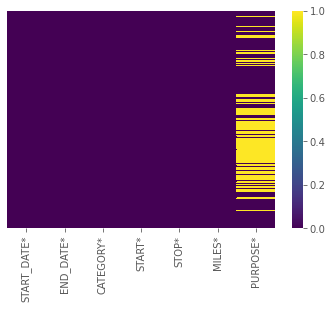

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:>

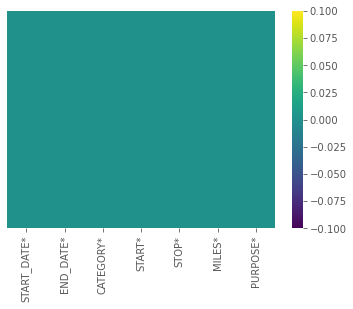

In [14]:
df=df.dropna()
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

### Step 4: Transforming the data

Getting an hour, day, days of the week, a month from the date of the trip.

In [15]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format="%m/%d/%Y %H:%M")
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format="%m/%d/%Y %H:%M")

<ipython-input-15-d725f562fc16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format="%m/%d/%Y %H:%M")
<ipython-input-15-d725f562fc16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format="%m/%d/%Y %H:%M")


In [16]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [17]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['HOUR']=hour
df['DAY']=day
df['DAY_OF_WEEK']=dayofweek
df['MONTH']=month
df['WEEKDAY']=weekday

<ipython-input-17-4955279c14b8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR']=hour
<ipython-input-17-4955279c14b8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAY']=day
<ipython-input-17-4955279c14b8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [18]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


**Finding traveling time.**

In [19]:
time=[]
df['TRAVELLING_TIME']=df['END_DATE*']-df['START_DATE*']
for i in df['TRAVELLING_TIME']:
    time.append(i.seconds/60)
df['TRAVELLING_TIME']=time
df.head()

<ipython-input-19-7b6061b1df4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRAVELLING_TIME']=df['END_DATE*']-df['START_DATE*']
<ipython-input-19-7b6061b1df4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRAVELLING_TIME']=time


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,4.0


**Calculating the average speed of the trip.**

In [20]:
df['TRAVELLING_TIME']=df['TRAVELLING_TIME']/60
df['SPEED']=df['MILES*']/df['TRAVELLING_TIME']
df.head()

<ipython-input-20-af7b607225da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRAVELLING_TIME']=df['TRAVELLING_TIME']/60
<ipython-input-20-af7b607225da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPEED']=df['MILES*']/df['TRAVELLING_TIME']


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,0.100000,51.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,1.116667,57.044776
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,0.066667,64.500000


### Step 5: Visualizing the data

Different categories of data. From data, we can see most of the people use UBER for business purposes.

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

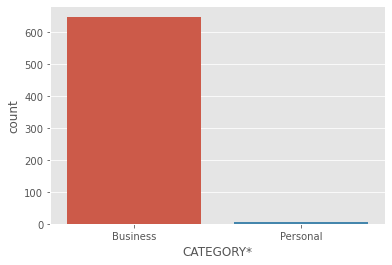

In [21]:
sns.countplot(x='CATEGORY*',data=df)

Histogram for miles. Most of people not having a long trip.

<AxesSubplot:ylabel='Frequency'>

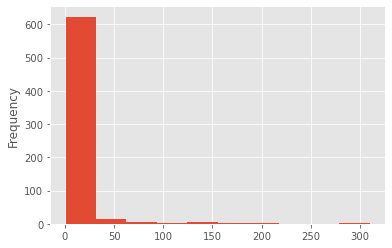

In [22]:
df['MILES*'].plot.hist()

Mostly the purpose of the trip is meeting and meal/entertain.Mostly people also use to their business.

<AxesSubplot:>

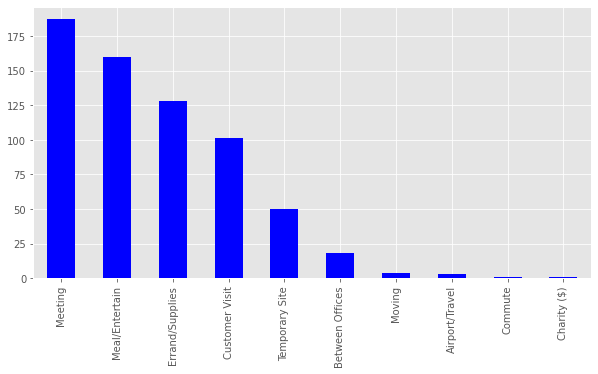

In [23]:
df['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

Trips per hour of the day.

<AxesSubplot:>

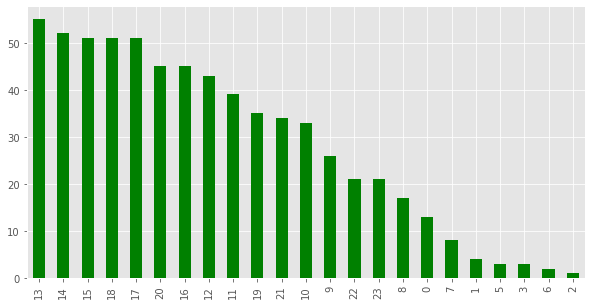

In [24]:
df['HOUR'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

Trips per day of a week. The highest number of trip on Friday.

<AxesSubplot:>

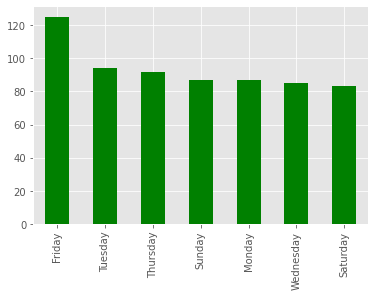

In [25]:
df['WEEKDAY'].value_counts().plot(kind='bar',color='green')

Trips per day of the month

<AxesSubplot:>

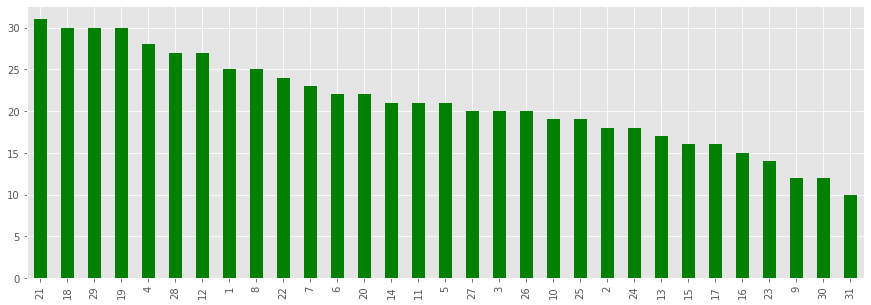

In [26]:
df['DAY'].value_counts().plot(kind='bar',figsize=(15,5),color='green')

Trips in a month.

<AxesSubplot:>

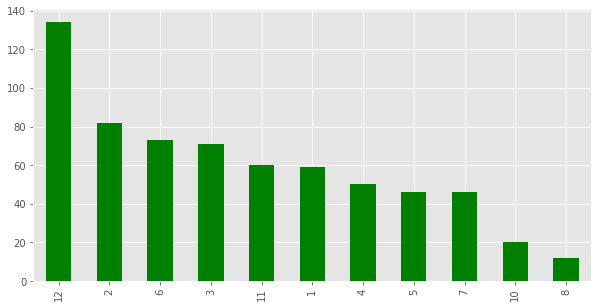

In [27]:
df['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

The starting points of trips. The highest number of people are fr;om Cary who takes the trip.

<AxesSubplot:>

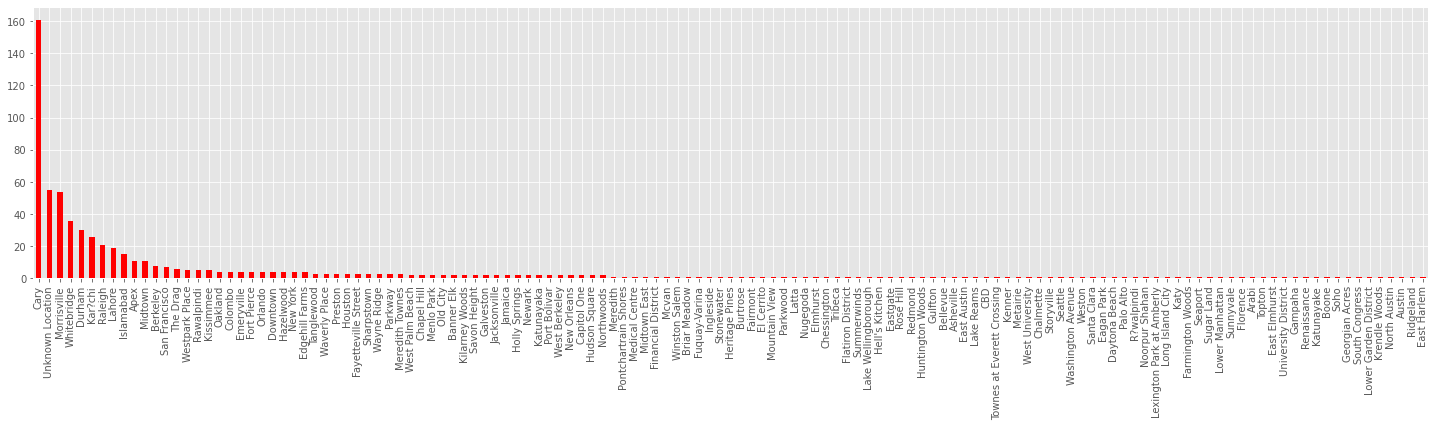

In [28]:
df['START*'].value_counts().plot(kind='bar',figsize=(25,5),color='red')

Comparing all the purpose with miles, hour, day of the month, day of the week, month, Travelling time.

<AxesSubplot:xlabel='PURPOSE*'>

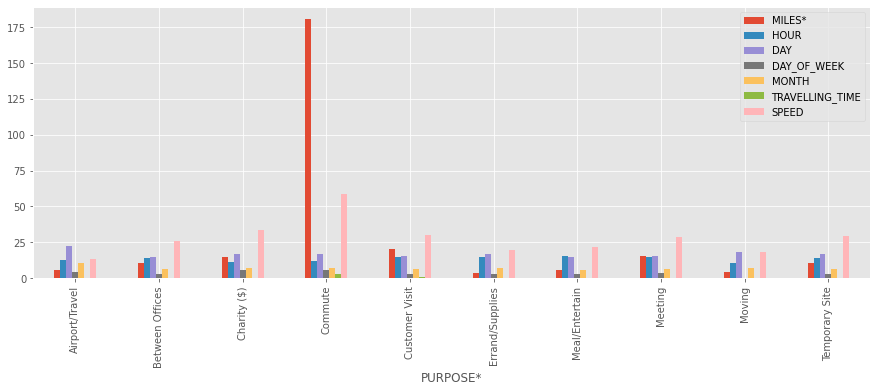

In [29]:
df.groupby('PURPOSE*').mean().plot(kind='bar',figsize=(15,5))

Conclusion                                                             
Here, we see the following topics:                                          

Data analysis                                   
Use of data analysis                                
UBER data analysis in Python.

you can download dataset: **https://www.kaggle.com/mohamed08/exploratory-data-analysis-for-uber-trips/data**